
#El método de Runge-Kutta de orden cuatro

El método de Runge-Kutta de orden cuatro es un método numérico para resolver ecuaciones diferenciales ordinarias. Se basa en aproximar la solución a 

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y)
\end{equation}

con condiciones iniciales $y(t_0)=y_0$ a:


\begin{equation}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{equation}

donde $h$ es el tamaño del paso y
\begin{equation}
k_1 = f(t_n, y_n)
\end{equation}
\begin{equation}
k_2 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1)
\end{equation}
\begin{equation}
k_3 = f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2)
\end{equation}
\begin{equation}
k_4 = f(t_n + h, y_n + hk_3)
\end{equation}
El orden de convergencia del método es cuatro, lo que significa que el error local es proporcional a $h^5$ y el error global es proporcional a $h^4$.





In [39]:
#@title librerías

import numpy as np
import matplotlib.pyplot as plt

In [40]:
def funcion(t, y, params):
  '''en los parametros ingresar a'''
  a = params[0]
  dydt = -a * y

  return dydt

In [41]:
funcion(0, 1, params=(1, ))   #probamos que funcione para ir descartando errores en el código

-1

In [42]:
def funcion(t, y, params):
  
  a = params[0]

  dydt = -a * y

  return dydt


#comenzamos por analizarlo para un caso específico --> luego lo generalizaremos

#condicione iniciales
t0 = 0
y0 = 100
a=1
params = (a, )


#ensayamos esto y lo revisamos por aparte


t0  =0
tfin = 1
Nt = 100               #numero de tiempos
t = np.linspace(t0, tfin, Nt)

h = 1 / Nt


k1 = funcion(t0, y0, params)
k2 = funcion(t0 + h/2 , y0 + h/2 * k1, params)
k3 = funcion(t0 + h/2 , y0 + h/2 * k2, params)
k4 = funcion(t0 + h , y0 + h * k3, params)

kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)

y1 = y0 + kmean * h    #evolución en el primer paso      --> debe generalizarse

t1 = t0 + h

k1 = funcion(t1, y1, params)
k2 = funcion(t1 + h/2 , y1 + h/2 * k1, params)
k3 = funcion(t1 + h/2 , y1 + h/2 * k2, params)
k4 = funcion(t1 + h , y1 + h * k3, params)

kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)

y2 = y1 + kmean * h 

y2

98.01986733084026

In [43]:
#la idea es ahora generalizarlo para n pasos

def funcion(t, y, params):
  
  a = params[0]
  dydt = -a * y
  #print(tn,val_y[i+1])

  return dydt



a=1
params = (a, )
t0  =0
tfin = 1
Nt = 100                  #numero de timpos
t = np.linspace(t0, tfin, Nt)

h = 1 / Nt

val_y = np.zeros(Nt)

val_y[0] = y0

for i,j in enumerate(t[1:]):

  tn = j
  h = 1 / Nt
  yn = val_y[i]

  k1 = funcion(tn, yn, params)
  k2 = funcion(tn + h/2 , yn + h/2 * k1, params)
  k3 = funcion(tn + h/2 , yn + h/2 * k2, params)
  k4 = funcion(tn + h , yn + h * k3, params)

  kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)

  val_y[i+1] = val_y[i] + kmean * h 

In [44]:
#ahora lo hacemos aun mas general

#la idea es ahora generalizarlo para n pasos

def funcion(t, y, params):
  
  a = params[0]

  dydt = -a * y

  return dydt


def sol(params):

  '''ingresar tl tiempo inicial, el final, y el numero de tiempos que quiere considerar (en este mismo orden)'''
  a = params[0]
  t0 = params[1]
  tfin = params[2]
  Nt = params[3]
  y0 = params[4]

  t = np.linspace(t0, tfin, Nt)

  h = 1 / Nt

  val_y = np.zeros(Nt)

  val_y[0] = y0

  for i,j in enumerate(t[1:]):

    tn = j
    h = 1 / Nt
    yn = val_y[i]

    param= (a,)

    k1 = funcion(tn, yn, param)
    k2 = funcion(tn + h/2 , yn + h/2 * k1, param)
    k3 = funcion(tn + h/2 , yn + h/2 * k2, param)
    k4 = funcion(tn + h , yn + h * k3, param)

    kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)

    val_y[i+1] = val_y[i] + kmean * h 
    
  return val_y

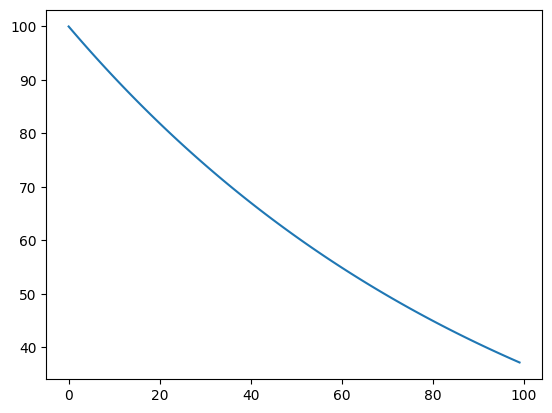

In [45]:
a=1
t0 = 0
tfin = 1
Nt = 100
y0 = 100              

params = (a, t0, tfin, Nt, y0)

plt.plot(sol(params));

#ejercicio 2: atractor de lorenz

##comenzamos por escribir las 3 ecuaciones para el atractor de lorenz

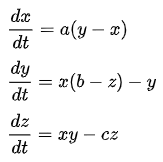

In [46]:
#@title librerías

import numpy as np
import matplotlib.pyplot as plt

In [47]:
#definimos las funciones correspondientes del atractor de lorentz

def funcion(t, x, y, z, params):
  '''ingresar los parámetros a, b, c respectivamente'''
  a = params[0]
  b = params[1]
  c = params[2]

  f = a * (y-x)
  g = x * (b - z) - y
  h = x*y - c*z

  return np.array([f, g, h])

In [48]:
#procedemos ahora con nuestra solucion

def sol(x0, y0, z0, params):

  '''ingresar los parametros (a, b, c, t0, tfin, h)'''''

  #condiciones iniciales y parámetros
  a = params[0]
  b = params[1]
  c = params[2]
  
  t0 = params[3]      #tiempo inicial
  tfin = params[4]    #tiempo final
  h = params[5]       #espaciamiento


  #tiempo
  t = np.arange(t0, tfin, h)
  Nt = len(t)                 #numero de tiempos que hay en t


  #arrays vacíos para ingresar los elementos correspondientes a la solucion en el intervalo dado
  val_x = np.zeros(Nt)
  val_y = np.zeros(Nt)
  val_z = np.zeros(Nt)

  val_x[0] = x0
  val_y[0] = y0
  val_z[0] = z0

  for i,j in enumerate(t[1:]):

    tn = j

    xn = val_x[i]
    yn = val_y[i]
    zn = val_z[i]

    #definimos las condiciones que se deben ir repitiendo, de acuerdo con la función que definimos previamente
    k1 = funcion(tn,        xn,            yn, zn, params)[0]
    k2 = funcion(tn + h/2 , xn + h/2 * k1, yn, zn, params)[0]    
    k3 = funcion(tn + h/2 , xn + h/2 * k2, yn, zn, params)[0]     
    k4 = funcion(tn + h ,   xn + h   * k3, yn, zn, params)[0]

    kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)

    m1 = funcion(tn,        xn,  yn,            zn, params)[1]
    m2 = funcion(tn + h/2 , xn , yn + h/2 * m1, zn, params)[1]    
    m3 = funcion(tn + h/2 , xn , yn + h/2 * m2, zn, params)[1]     
    m4 = funcion(tn + h ,   xn , yn + h   * m3, zn, params)[1]

    mmean = (1/6) * (m1 + 2*m2 + 2*m3 + m4)

    o1 = funcion(tn,        xn,  yn, zn,            params)[2]
    o2 = funcion(tn + h/2 , xn , yn, zn + h/2 * o1, params)[2]    
    o3 = funcion(tn + h/2 , xn , yn, zn + h/2 * o2, params)[2]     
    o4 = funcion(tn + h ,   xn , yn, zn + h   * o3, params)[2]

    omean = (1/6) * (o1 + 2*o2 + 2*o3 + o4)

      
    #ingresamos los nuevos valores a los arrays vacíos que creamos previamente
    val_x[i+1] = val_x[i] + kmean * h 
    val_y[i+1] = val_y[i] + mmean * h 
    val_z[i+1] = val_z[i] + omean * h 
    
  return val_x, val_y, val_z

In [49]:
#procedemos ahora con la graficacion de x, y, x con respecto al tiempo

a = 10
b = 97
c = 8/3

t0 = 0
tfin = 40
h = 0.001

t = np.arange(t0, tfin, h)

x0 = 1 
y0 = 1 
z0 = 1              

params= (a, b, c, t0, tfin, h)

soluciones = sol(x0, y0, z0, params)

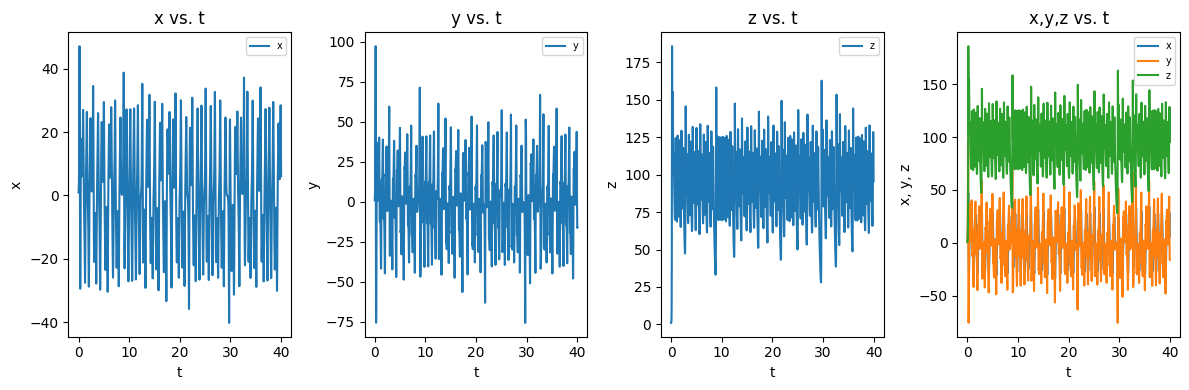

In [50]:
#@title graficación individual

fig, axs = plt.subplots(1, 4, figsize =(12, 4))

#graficamos individualmente

axs[0].plot(t, soluciones[0], label = ('x'))
axs[1].plot(t, soluciones[1], label = ('y'))
axs[2].plot(t, soluciones[2], label = ('z'))

#superponemos las graficas

axs[3].plot(t, soluciones[0], label = ('x'))
axs[3].plot(t, soluciones[1], label = ('y'))
axs[3].plot(t, soluciones[2], label = ('z'))

#organizamos un poco las graficas

axs[0].set_title('x vs. t')
axs[1].set_title('y vs. t')
axs[2].set_title('z vs. t')
axs[3].set_title('x,y,z vs. t')

axs[0].set_xlabel('t')
axs[1].set_xlabel('t')
axs[2].set_xlabel('t')
axs[3].set_xlabel('t')

axs[0].set_ylabel('x')
axs[1].set_ylabel('y')
axs[2].set_ylabel('z')
axs[3].set_ylabel('x, y, z')

axs[0].legend(loc='best', fontsize=7)
axs[1].legend(loc='best', fontsize=7)
axs[2].legend(loc='best', fontsize=7)
axs[3].legend(loc='best', fontsize=7)

fig.tight_layout();

Observamos que el la funcion sol que se ha construido es una 'generalización', debido a que se ha realizado vectorialmente, es decir, se pueden ingresar $n$ funciones, y con unas pocas modificaciones en medio del código se pueden obtener las soluciones y las graficas para las $n$ funciones.

In [51]:
np.shape(soluciones)

(3, 40000)

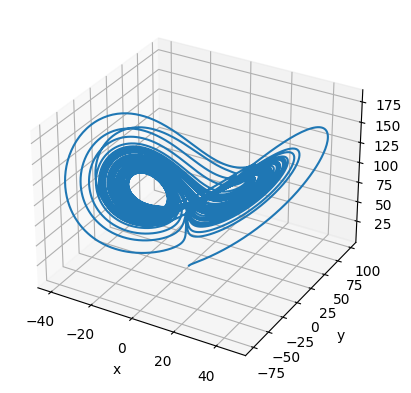

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = soluciones[0]
y = soluciones[1]
z = soluciones[2]

ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()